In [1]:
import heron
import heron.regression as hgp
import heron.filtering as hf

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy import signal

In [3]:
gp = hgp.load("/home/daniel/repositories/heron/scripts/paper_models/models/undiscovered snafu.gp")

/home/daniel/.virtualenvs/IGRlaptop21/heron/lib/python2.7/site-packages/matplotlib-2.0.0-py2.7-linux-x86_64.egg/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u"'URW Bookman L'"] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


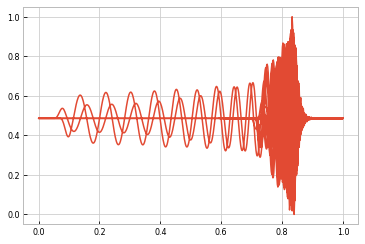

In [4]:
plt.plot(gp.training_data[:,0], gp.training_y)

In [5]:
noise = np.random.randn(200)*0.4
noisy_data = gp.training_y[200:400]+noise
noisy_time = gp.training_data[200:400,0]

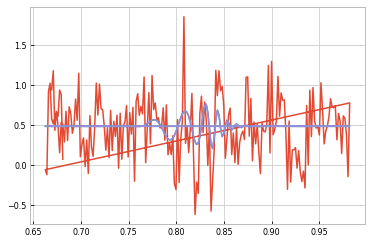

In [6]:
plt.plot(noisy_time ,noisy_data)

template = noisy_data = gp.training_y[200:400]
template_time = gp.training_data[200:400,0]
plt.plot(noisy_time ,noisy_data)
plt.plot(template_time, template)

In [7]:
gp.training_data[201]

array([ 0.67111853,  0.        ,  0.14151821,  0.        ,  0.5       ,
        1.        ,  0.        ,  0.29292677])

In [8]:
filtering = hf.Filter(gp, noisy_time, noisy_data)# gp.training_data[201],  )

In [38]:
likes = []
for b in np.linspace(-1, 1, 20):
    for a in np.linspace(-1,1, 20):
        likes.append(filtering.matched_likelihood([ 0.67111853,  0,  a,  0.,  b, 1.,  0.,  0.29292677]))

In [39]:
likes = np.array(likes)

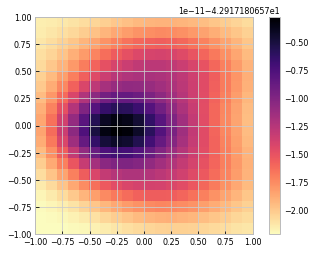

In [41]:
plt.imshow(likes.reshape(20,20), origin='lower', extent=[-1,1,-1,1])
plt.colorbar()

In [46]:
likes = []
for b in np.linspace(-1, 1, 20):
    for a in np.linspace(-1,1, 20):
        likes.append(filtering.matched_likelihood([ 0.67111853,  0,  a,  0,  .5, b,  0.,  0.29292677]))

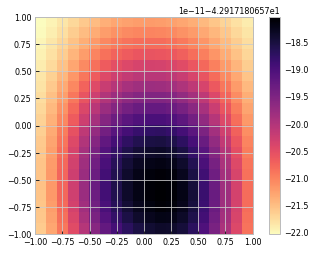

In [47]:
likes = np.array(likes)
plt.imshow(likes.reshape(20,20), origin='lower', extent=[-1,1,-1,1])
plt.colorbar()